In [1]:
%matplotlib notebook
from EIANN import *
from EIANN_utils import *

In [2]:
input_size = 2
dataset = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
target = torch.tensor([[0.,0.],[1.,0.],[1.,0.],[0.,1.]])

epochs=300
seed=42

Backprop as RNN (softplus)

<IPython.core.display.Javascript object>


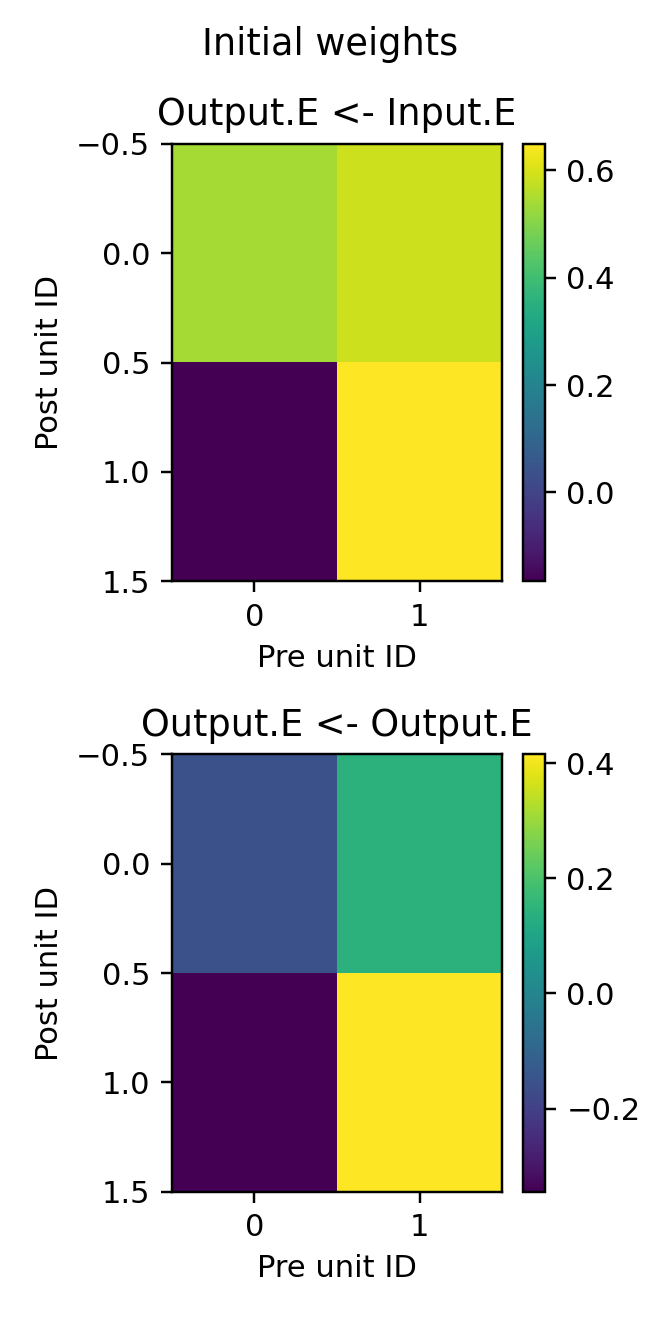

<IPython.core.display.Javascript object>


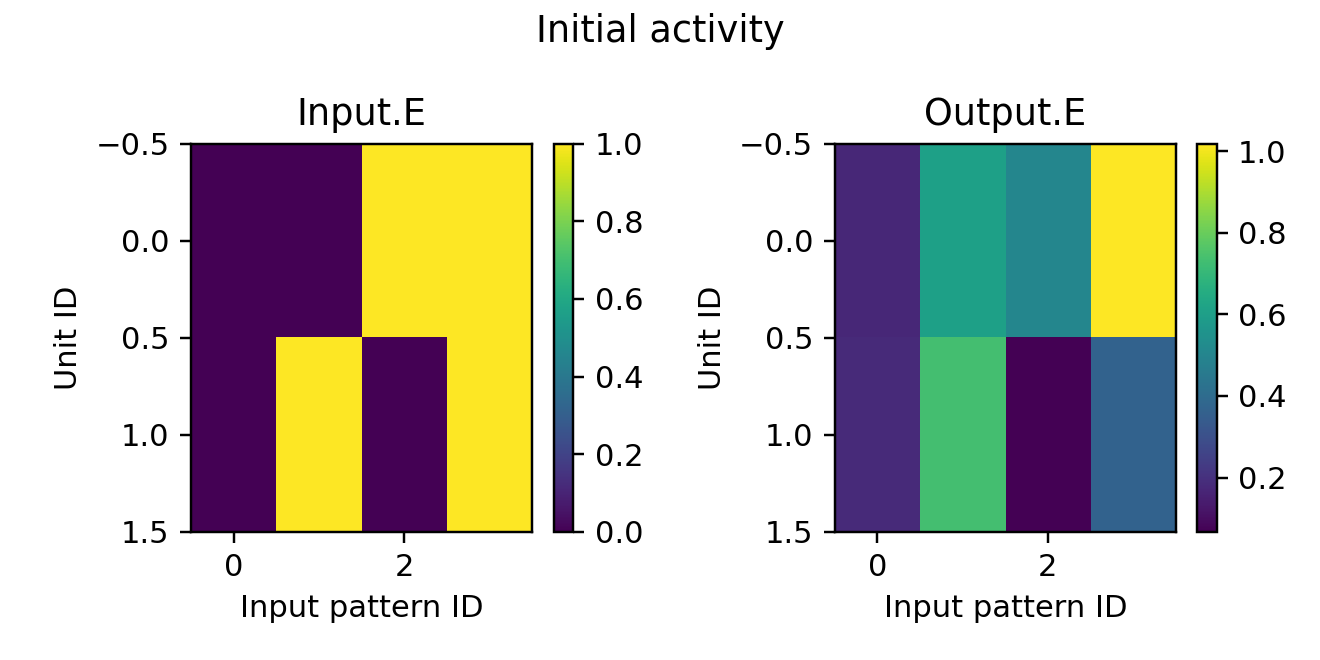

<IPython.core.display.Javascript object>


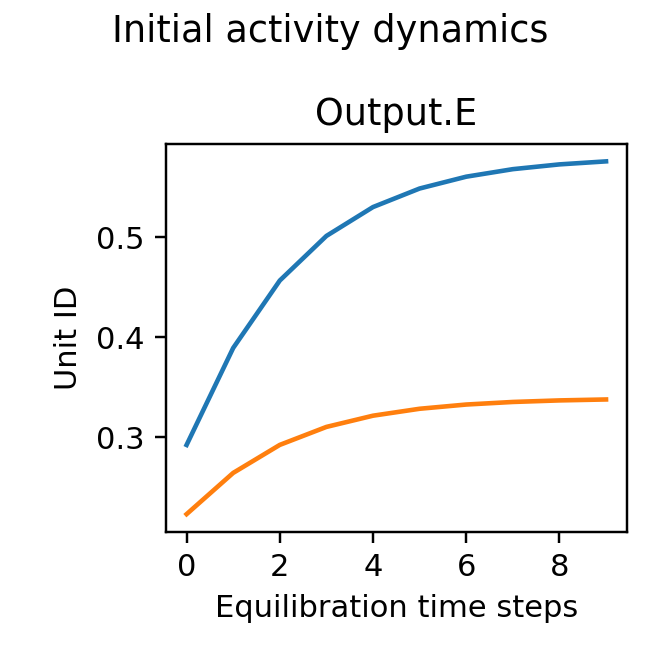

Initial population biases:
Output E Parameter containing:
tensor([ 0.4408, -0.3668], requires_grad=True)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 226.65it/s]


<IPython.core.display.Javascript object>


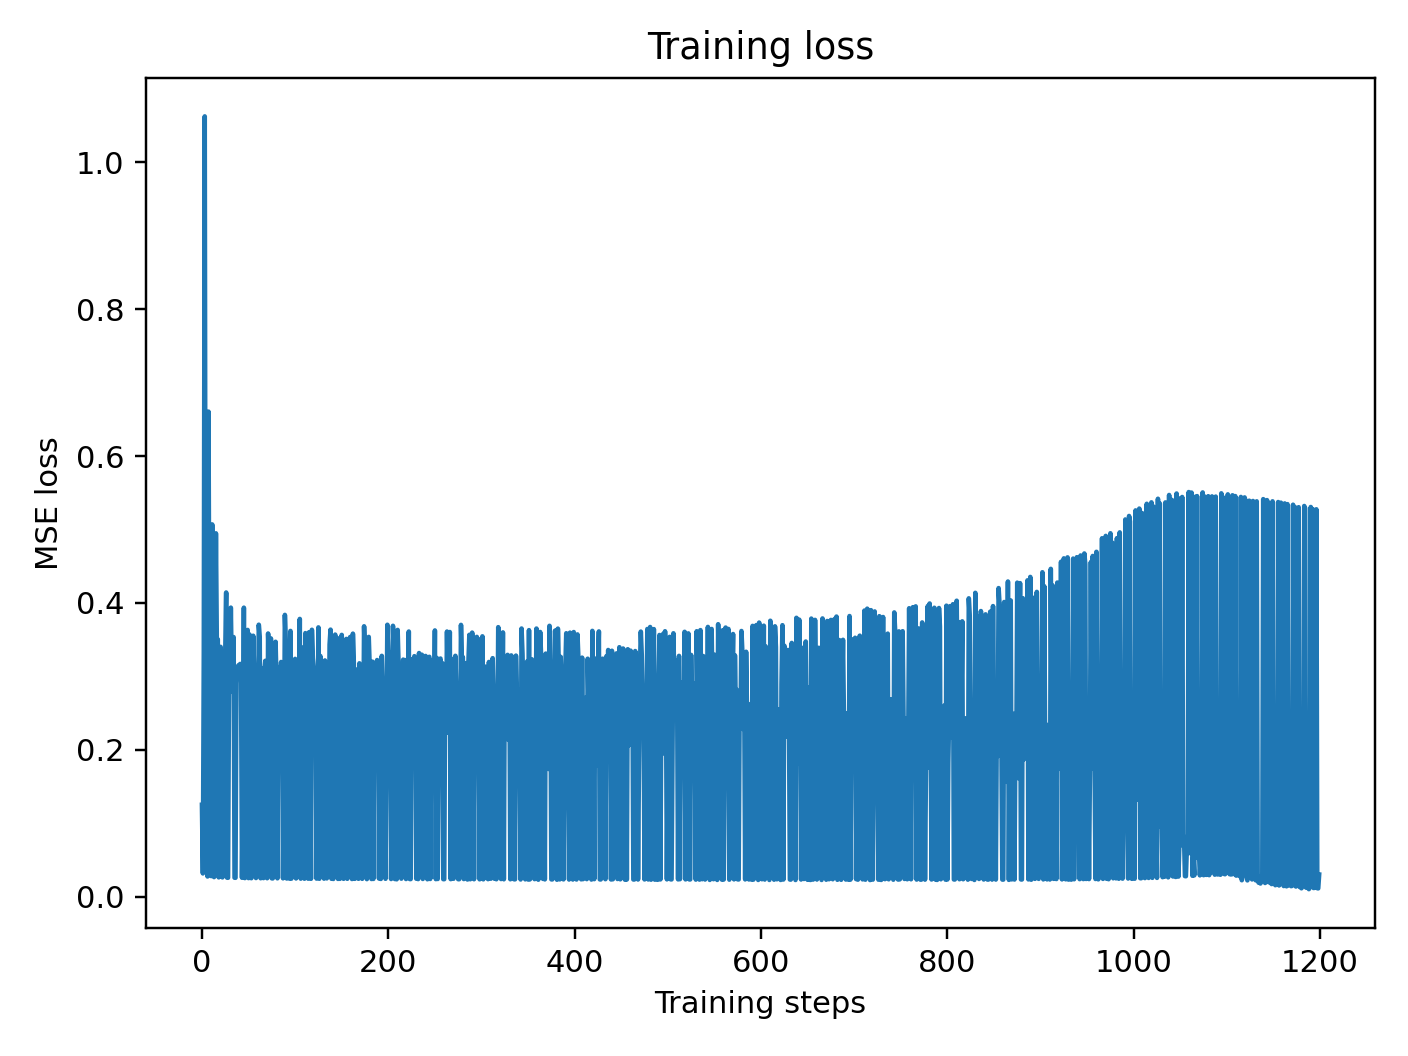

<IPython.core.display.Javascript object>


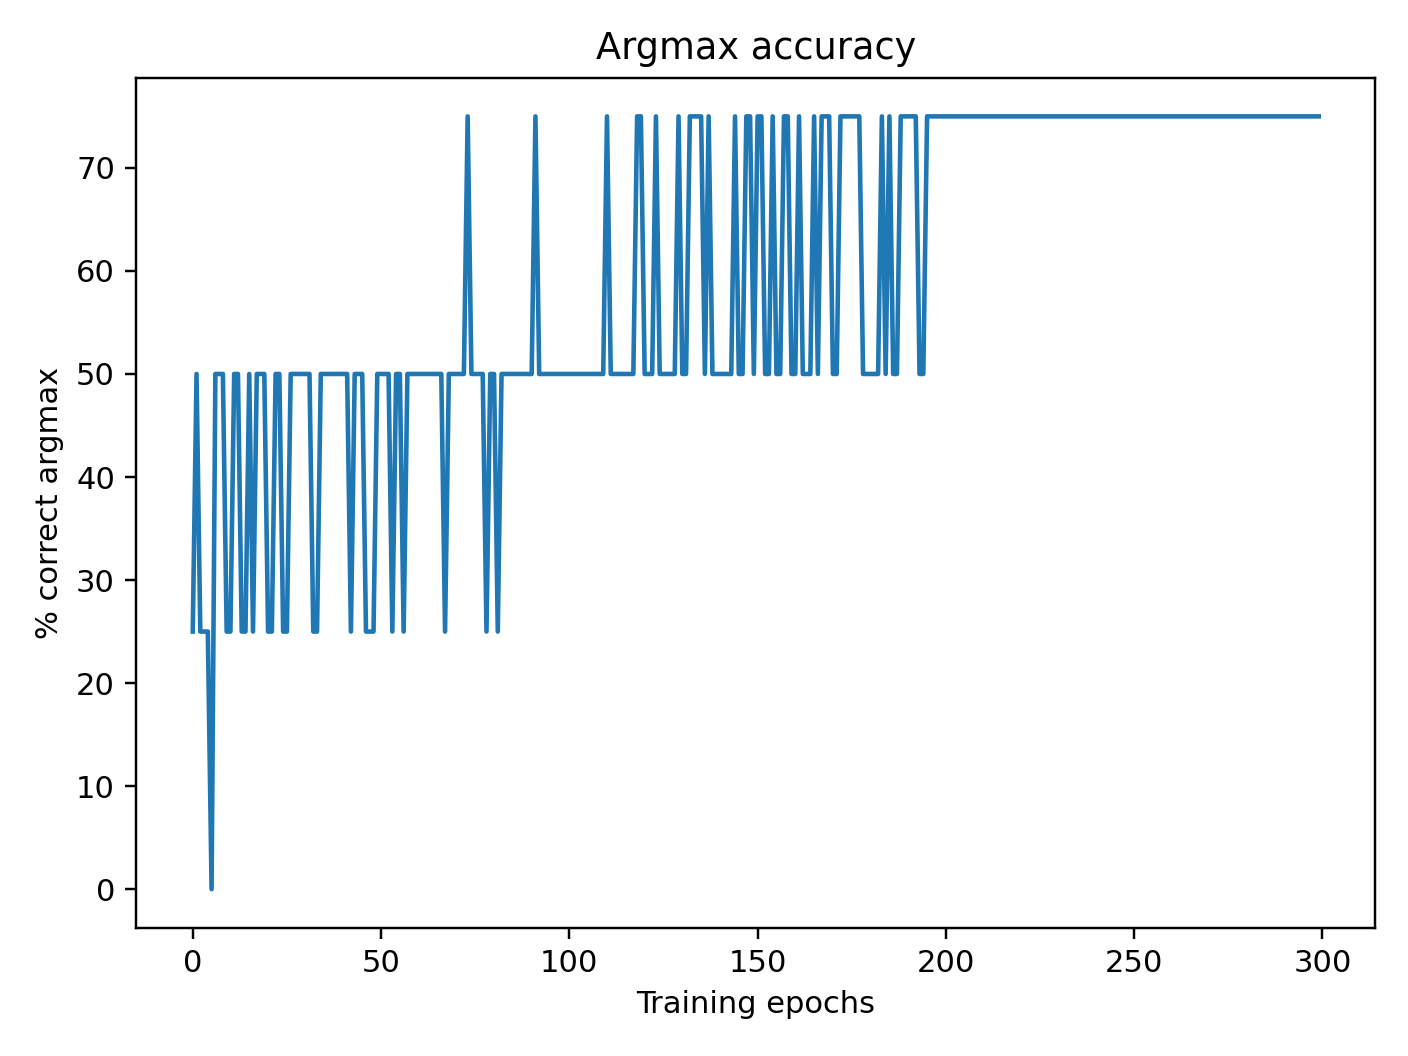

<IPython.core.display.Javascript object>


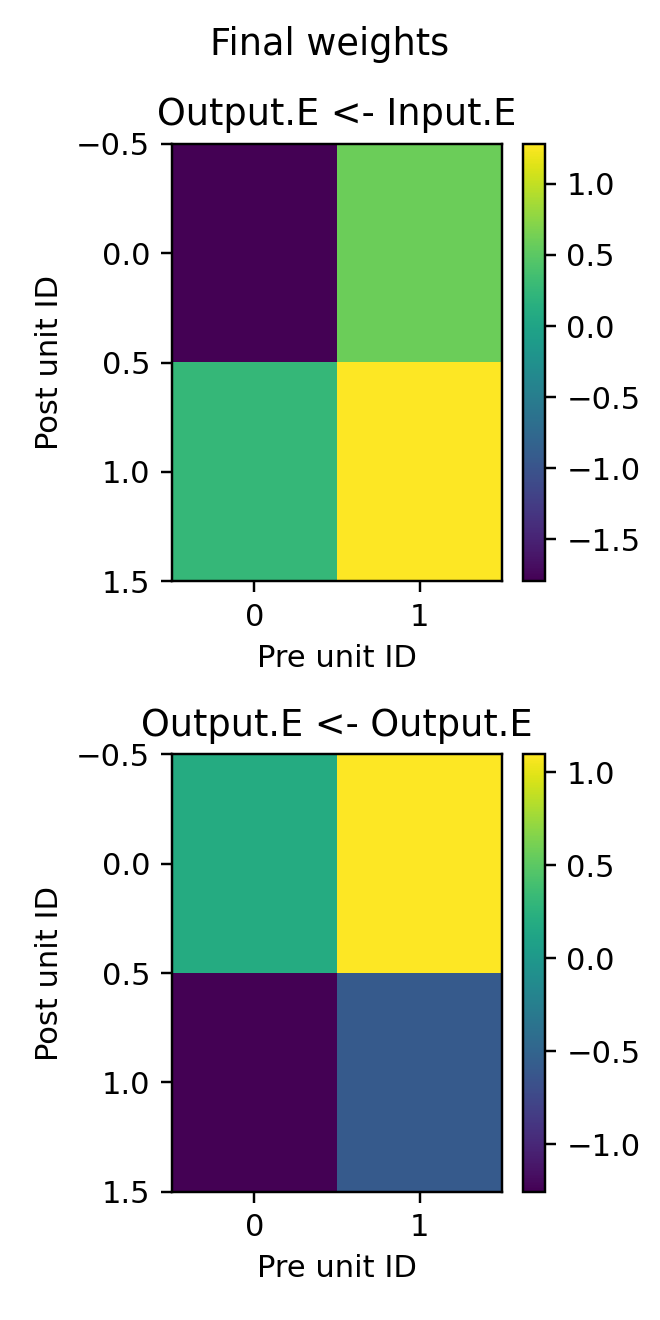

<IPython.core.display.Javascript object>


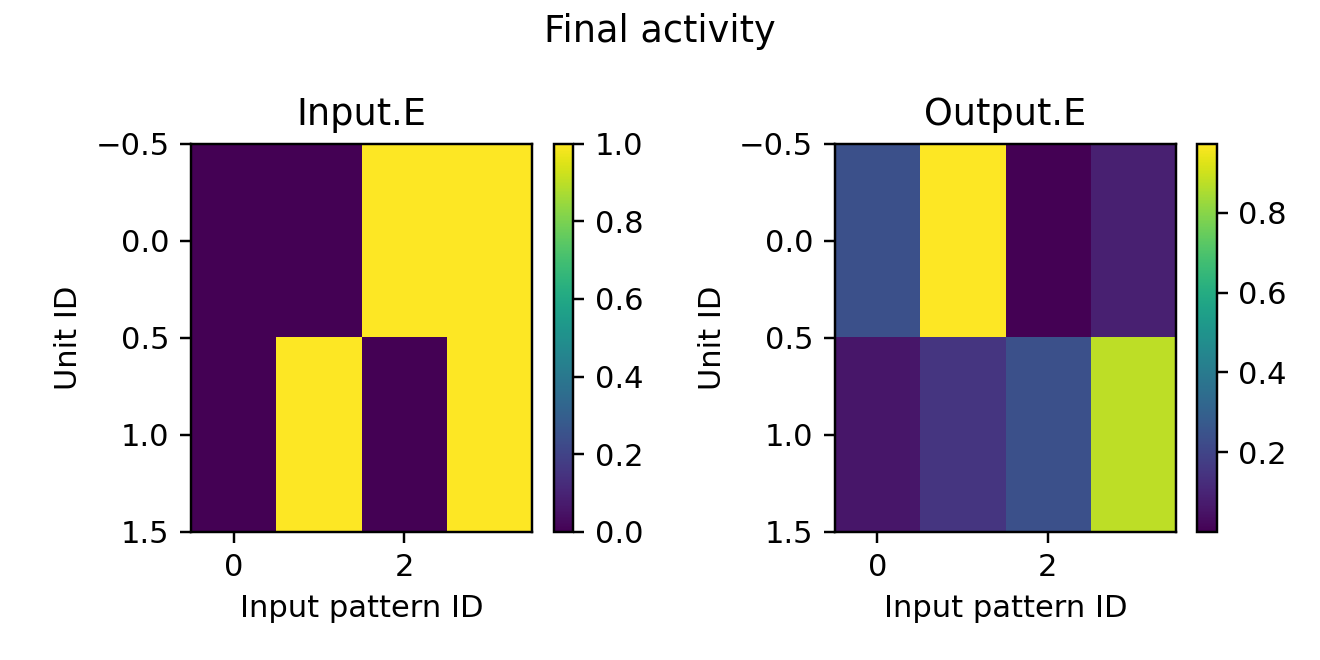

<IPython.core.display.Javascript object>


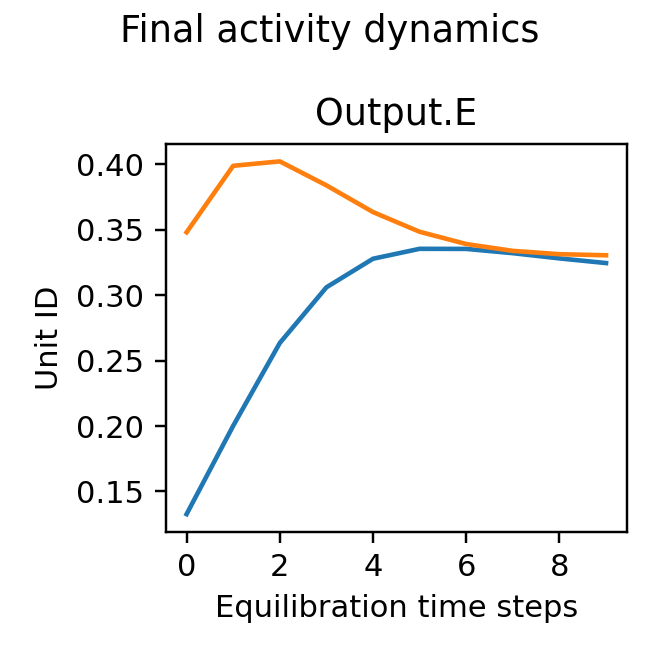

Final population biases:
Output E Parameter containing:
tensor([ 0.4408, -0.3668], requires_grad=True)


In [3]:
layer_config = {'Input':
                      {'E': 
                           {'size': 2}},
                'Output': 
                      {'E': 
                           {'size': 2, 
                            'activation': 'softplus', 
                            'activation_kwargs': 
                                {'beta': 4.}, 
                            'bias_learning_rule': 'Backprop'
                           }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   },
                               'Output': 
                                   {'E': 
                                        {'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.3
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

In [6]:
network.parameters

<bound method Module.parameters of Network(
  (criterion): MSELoss()
  (module_list): ModuleList(
    (0): Projection(in_features=2, out_features=2, bias=False)
    (1): Projection(in_features=2, out_features=2, bias=False)
  )
  (parameter_list): ParameterList(  (0): Parameter containing: [torch.FloatTensor of size 2])
)>

Backprop as RNN (relu)

In [ ]:
layer_config = {'Input':
                      {'E': 
                           {'size': 2}}, 
                'Output': 
                      {'E': 
                           {'size': 2, 
                            'activation': 'relu',
                            'bias_learning_rule': 'Backprop'
                           }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   },
                               'Output': 
                                   {'E': 
                                        {'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.3
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

Backprop w/inhibition (softplus)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 2}}, 
                'Output': 
                      {'E': 
                           {'size': 2, 
                            'activation': 'softplus', 
                            'activation_kwargs': 
                                {'beta': 4.}, 
                            'bias_learning_rule': 'Backprop'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'softplus', 
                            'activation_kwargs': 
                                {'beta': 4.}
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.3
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

Backprop w/inhibition (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 2}}, 
                'Output': 
                      {'E': 
                           {'size': 2, 
                            'activation': 'relu',
                            'bias_learning_rule': 'Backprop'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_bounds': (0, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'Backprop'
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 2,
                         'learning_rate': 0.3
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)

BTSP w/learned bias and learned somatic inhibition (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 2}}, 
                'Output': 
                      {'E': 
                           {'size': 2, 
                            'activation': 'relu',
                            'bias_learning_rule': 'DendriticLossBias'
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu'
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'direction': 'F', 
                                         'learning_rule': 'BTSP',
                                         'learning_rule_kwargs': 
                                             {'pos_loss_th': 0.25,
                                              'neg_loss_th': -0.125
                                             }
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_bounds': (None, 0), 
                                         'direction': 'R', 
                                         'learning_rule': 'DendriticLoss'
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_',
                                         'weight_init_args': (1,),
                                         'weight_constraint': 'normalize_weight',
                                         'weight_constraint_kwargs': 
                                             {'scale': 2
                                             },
                                         'weight_bounds': (0.01, None), 
                                         'direction': 'F', 
                                         'learning_rule': 'GjorgievaHebb',
                                         'learning_rule_kwargs': 
                                             {'sign': -1
                                             }
                                        }
                                   }
                              }
                         }
                    }

training_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 0.25
                        }

network = Network(layer_config, projection_config, seed=seed, **training_kwargs)
test_EIANN_config(network, dataset, target, epochs)